In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving cancer_classification.csv to cancer_classification.csv


In [ ]:
import io

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('cancer_classification.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


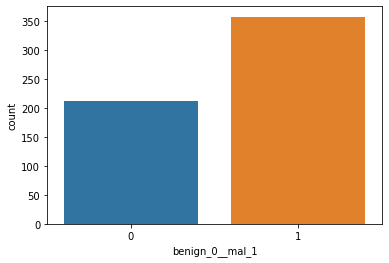

In [ ]:
sns.countplot(x = 'benign_0__mal_1',data = df) #its preferred to use countplot firstly in a classification problem

In [ ]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [ ]:
df.corr()['benign_0__mal_1'].sort_values() #it means seeing the correlation w.r.t the outcome and sort values means sorting the values 

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

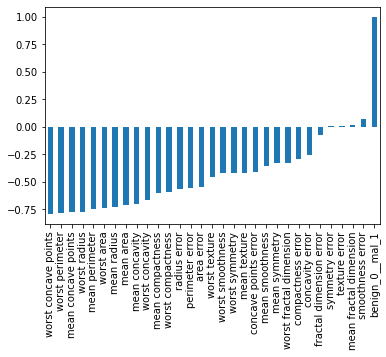

In [ ]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind = 'bar') #seeing which is positively and which is negatively correlated to the benign_0__mal_1

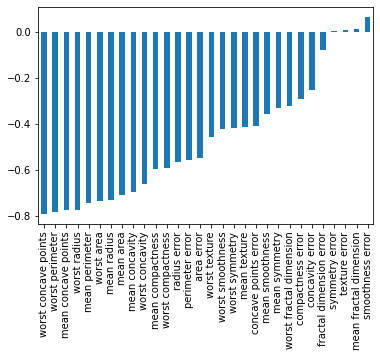

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar') #except the last as it will obviously show 100% correlation

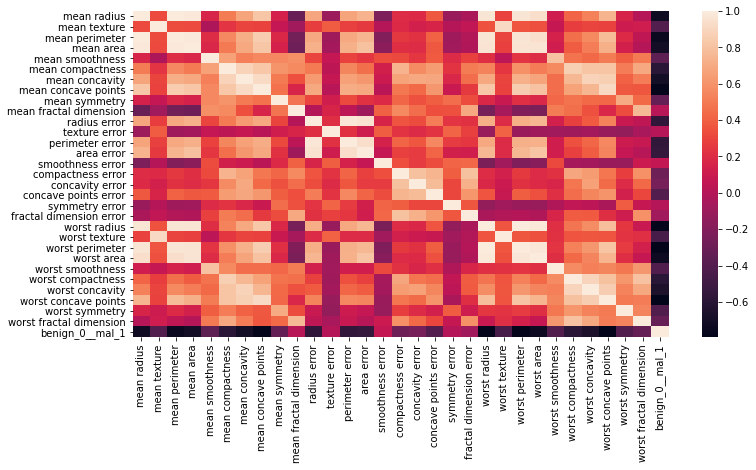

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())

In [ ]:
X = df.drop('benign_0__mal_1',axis = 1).values
y = df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape #means 426 rows and 30 features

(426, 30)

In [ ]:
model = Sequential()


model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu')) #we cut the 30 to half in 15

#IN BINARY CLASSIFICATION PROBLEM SIGMOID IS USED IN THE LAST ACTIVATION
model.add(Dense(1,activation = 'sigmoid')) #last layer , hence it is 1

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [ ]:
#training and testing the data
model.fit(x = X_train,y = y_train,epochs = 600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 28ms/step - loss: 0.6987 - val_loss: 0.6796
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6704 - val_loss: 0.6528
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6331 - val_loss: 0.6253
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6162 - val_loss: 0.5973
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5756 - val_loss: 0.5681
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5522 - val_loss: 0.5412
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5393 - val_loss: 0.5125
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4850 - val_loss: 0.4846
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4633 - val_loss: 0.4623
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4541 - val_loss: 0.4423
Epoch 11

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,val_loss
0,0.692667,0.679578
1,0.663044,0.652812
2,0.634420,0.625275
3,0.604872,0.597341
4,0.578426,0.568101
...,...,...
595,0.002254,0.447466
596,0.002003,0.463387
597,0.001947,0.463063
598,0.002211,0.470432


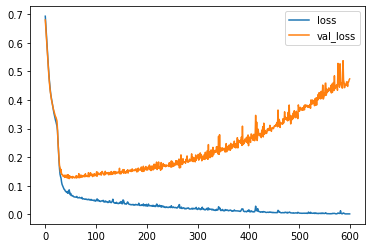

In [ ]:
losses.plot() #here our model is overfitting as the val_loss(test data) is on a much higher level(spiky noises like structures too) than the loss(training data), both the losses go down on the same level however the val_loss increases and keeps on inc which implies that we have used too many epochs over here

In [ ]:
#now we'll learn how to use a callback, a callback called earlystopping stops the model training when it starts to overtrain

In [ ]:
model = Sequential()


model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu')) #we cut the 30 to half in 15

#IN BINARY CLASSIFICATION PROBLEM SIGMOID IS USED IN THE LAST ACTIVATION
model.add(Dense(1,activation = 'sigmoid')) #last layer , hence it is 1

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#the monitor is the thing we our monitoring in the overfitted data which in this case is the validation loss(val_loss aka test data)
#keep in mind--> if the metric is accuracy then the mode is 'max' because accuracy needs to be maximized and if the metric is loss then it needs to be minimized so the mode is 'min
# there is another mode 'auto' which detects automatically most of the time however user defined mode putting such as 'min' 'max' is preferred


early_stop = EarlyStopping(monitor = 'val_loss',mode = 'min',verbose = 1,patience =25) #patience 25 means we'll wait for 25 epochs more even after we have detected the stopping point due to the noise that could occur.


In [ ]:
model.fit(x = X_train,y = y_train,epochs = 600,validation_data=(X_test,y_test),callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.7062 - val_loss: 0.6750
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6549 - val_loss: 0.6423
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6211 - val_loss: 0.6176
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6030 - val_loss: 0.5916
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5772 - val_loss: 0.5600
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5487 - val_loss: 0.5255
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5163 - val_loss: 0.4846
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4785 - val_loss: 0.4387
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4134 - val_loss: 0.3941
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3855 - val_loss: 0.3527
Epoch 11

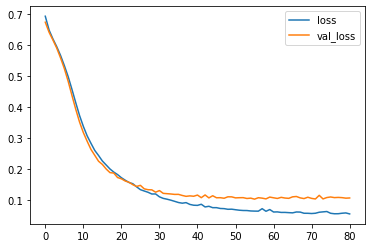

In [ ]:
new_loss = pd.DataFrame(model.history.history)
new_loss.plot() #this is a correct graph that is required(the spiky noises like structures are similar too)

In [ ]:
#next to prevent over fitting we'll use dropout layers which will turn off a percentage of neurons randomly 

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
#every time we copy paste the down code, it means we are training the new model here we'll use both early stopping as well as dropout , previously we used only early stopping and saw the results
model = Sequential()


model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.5)) #the no. after the dropout is the rate of percentage of neuron that we want to turn off(1 is 100% and 0 is 0%, here 0.5 is 50%)

model.add(Dense(15,activation = 'relu')) #we cut the 30 to half in 15
model.add(Dropout(0.5)) #also each neuron will have 50% probability of being turned off

#IN BINARY CLASSIFICATION PROBLEM SIGMOID IS USED IN THE LAST ACTIVATION
model.add(Dense(1,activation = 'sigmoid')) #last layer , hence it is 1

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [ ]:
model.fit(x = X_train,y = y_train,epochs = 600,validation_data=(X_test,y_test),callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6773 - val_loss: 0.6707
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6762 - val_loss: 0.6510
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6440 - val_loss: 0.6319
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6339 - val_loss: 0.6093
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6102 - val_loss: 0.5744
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6102 - val_loss: 0.5432
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5702 - val_loss: 0.5122
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5521 - val_loss: 0.4789
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5002 - val_loss: 0.4413
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5149 - val_loss: 0.4102
Epoch 11

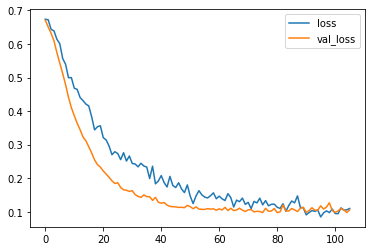

In [ ]:
#analyzing the above loss now as done in others
loss3 = pd.DataFrame(model.history.history) 
loss3.plot()

#this is even better as we see that the training loss and the validation loss are together going down and eventually flattening at the end at the same level, this is a much improved performance and absolutely fantastic

In [ ]:
#now we'll do a full evaluation on classes based off on a classification task(either 0 or 1) instead of model.predict(X_test) we say model.predict_classes(X_test)

In [ ]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
